In [1]:
%matplotlib inline
from collections import Counter
import random

import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

import scipy

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from copy import deepcopy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Omkar\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv("C:/b/study_in_neu/INFO7390/TrafficAccidentDataset2.csv")
#load dataset

In [3]:
#dropping rows for null values
df_nonull = df.dropna() #dropna(axis=1) will drop all col having null dropna(how = 'all') will drop all rows with all null

In [4]:
# There are some mistakes that have occured at the point of entry
cleanup_make = {"Make":     {"ACCUR":"ACURA","ACUR":"ACURA","BUIC":"BUICK","CADI":"CADILAC","CADILLAC":"CADILAC","CHEV":"CHEVROLET","CHEVEROLET":"CHEVROLET","CHEVRLETE":"CHEVROLET","CHEVORLET":"CHEVROLET","CHEVY":"CHEVROLET","CHRY":"CHRYSLER", "CHRYSLAR":"CHRYSLER", "CHRYSTLER":"CHRYSLER","CRYSTLER":"CHRYSLER", "DODG":"DODGE","HOND":"HONDA", "HONDAA":"HONDA", "HYANDAI":"HYUNDAI", "HYNDAI":"HYUNDAI", "HYUNDI":"HYUNDAI", "HYUNDIA":"HYUNDAI", "INFI":"INFINITY", "INFINIT":"INFINITY", "INIF":"INFINITY", "ISU":"ISUZU", "ISUZ":"ISUZU", "JAG":"JAGUAR", "KAW":"KAWASAKI", "KEN":"KENWORTH", "LANDROVER":"LAND ROVER","LEX":"LEXUS", "LEXS":"LEXUS", "LEXU":"LEXUS", "LINC":"LINCON", "LINCOLN":"LINCON", "LNDR":"LAND ROVER", "M BENZ":"MERCEDES","MAZADA":"MAZDA","MAZD":"MAZDA","MERC":"MERCEDES", "MERCEDES BENZ": "MERCEDES", "MERCEDEZ": "MERCEDES", "MERZ":"MERCEDES", "MINI":"MINI COOPER", "MISS":"MITSUBISHI", "MITS":"MITSUBISHI","MITSUBUSHI":"MITSUBISHI", "MITTS":"MITSUBISHI","NIS":"NISSAN","NISS":"NISSAN", "NISSAB":"NISSAN", "NISSIAN":"NISSAN", "OLDS":"OLDSMOBILE", "PONT":"PONTIAC", "RANGE ROVER":"LAND ROVER", "SATR":"SATURN", "SATURRN":"SATURN","SCIO":"SCION", "STRN":"SATURN", "SUB":"SUBARU", "SUBA":"SUBARU", "SUBRARU":"SUBARU","SUBURU":"SUBARU","SUZI":"SUZUKI","TOY":"TOYOTA","TOYO":"TOYOTA", "TOYOT":"TOYOTA","TOYATA":"TOYOTA", "TOYOTOA":"TOYOTA","TOYOVAL2014":"TOYOTA", "TOYOYA":"TOYOTA", "TOYOYTA":"TOYOTA", "TOYT":"TOYOTA","VOLK":"VOLKSWAGEN","VOLKS":"VOLKSWAGEN","VOLV":"VOLVO","VOLV0":"VOLVO", "VW":"VOLKSWAGEN", "XX":"UNKNOWN", "RIELLA":"UNKNOWN", "PORS":"PORSCHE","0":"UNKNOWN","2004":"UNKNOWN" }}
df_nonull.replace(cleanup_make, inplace=True)

C:\Users\Omkar\Anaconda3\lib\site-packages\pandas\core\generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


Plotting data of Time vs Color of cars.
It was obeserved that colors of cars were heavily factor for accident at particular the time of day.
The Time was noted in the form of hh:mm:ss with 24 hour clock format. 
The obervation was most interested in hour of the day.

In [5]:
#convert to date time
df_nonull['Time'] =pd.to_datetime(df_nonull['TimeOfStop'])
# extract the hour
df_nonull['timenw'] = df_nonull['Time'].dt.hour
# convert to numeric
df_nonull['timenw'] = pd.to_numeric(df_nonull['timenw'])

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [6]:
# put this code after following before clustering
df_nonull["Color"] = df_nonull["Color"].astype('category')
df_nonull["ColorCode"] = df_nonull["Color"].cat.codes

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


One way to do this was to convert the given color into hexa decimal format and then to rank as per shades.
Unfortunately I was not able to rank the color based on their brightness as the details were not provided in depth.

Just plotting the graphs with Color Name vs Time of the day

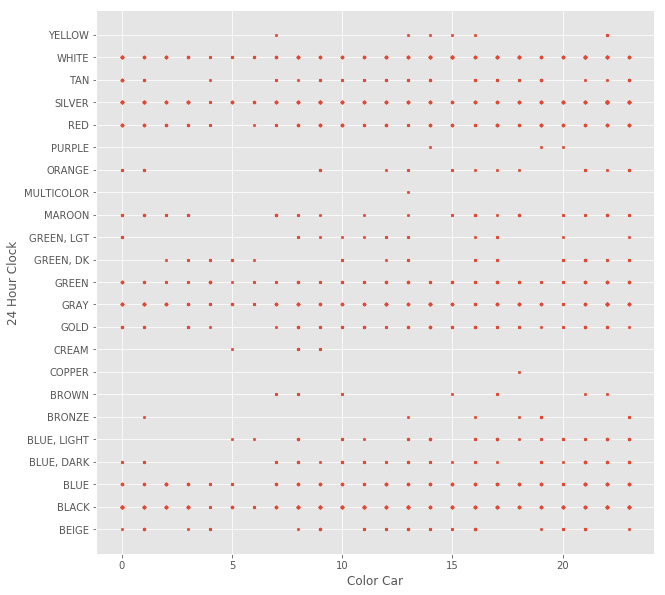

In [40]:
f1 = df_nonull['timenw'].values
f2 = df_nonull['Color'].values
X = np.array(list(zip(f1,f2)))
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Color Car')
plt.ylabel('24 Hour Clock')
plt.scatter(f1,f2,s=7)

* Does the clustering produce interesting groupings?
Some hollow areas can be noticed at X(0-7) and Y(Blue,Light - Cream) & X(3-8) and Y(Purple - Multicolor). These are the color that can be easily noticed in the dark. So we don't see them 'much' being spottet on the plot.  

([<matplotlib.axis.YTick at 0x259c9ca3160>,
 <a list of 25 Text yticklabel objects>)

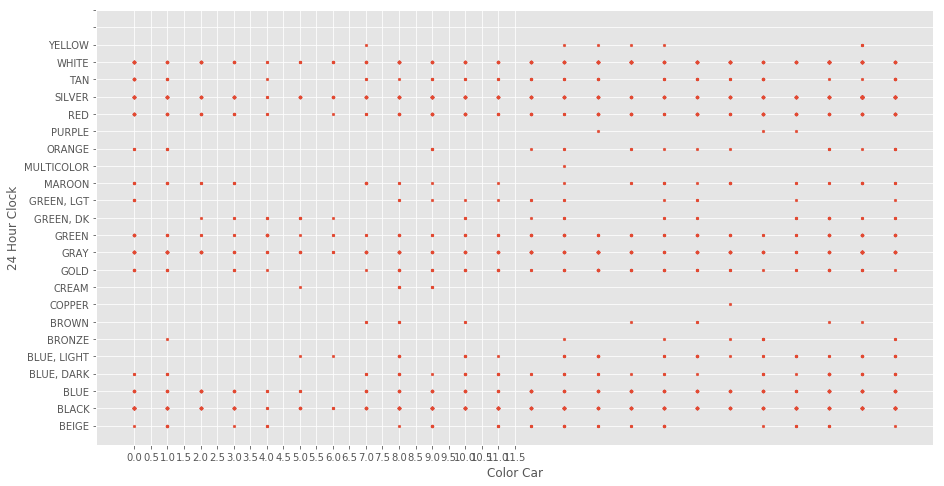

In [41]:
f1 = df_nonull['timenw'].values
f2 = df_nonull['Color'].values
X = np.array(list(zip(f1,f2)))
fig = plt.figure(figsize=(15, 8))
plt.scatter(f1,f2, s=7)
plt.xlabel('Color Car')
plt.ylabel('24 Hour Clock')
plt.xticks(np.arange(0, 12, 0.5)) 
plt.yticks(np.arange(0, 25, 1)) 

* Does scaling effect the clustering?
Scaling of the scatter plot is done w.r.t. X axis by putting the intervals as 0.5.
It turns out that the data is quite accurate.
It can be concluded that accuracy is at both time is perfect.

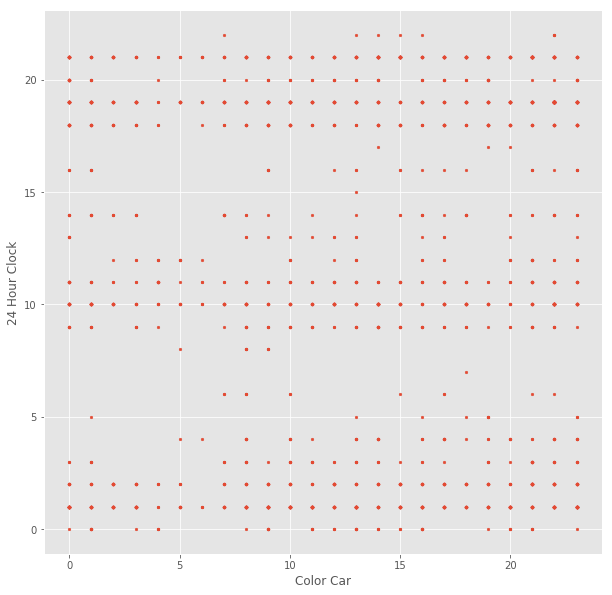

In [43]:
f1 = df_nonull['timenw'].values
f2 = df_nonull['ColorCode'].values
X = np.array(list(zip(f1,f2)))
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Color Car Code')
plt.ylabel('24 Hour Clock')
plt.scatter(f1,f2,s=7)

[[ 16.60238569  10.34791252]
 [  1.89083821  16.00194932]
 [  5.95421245   2.33150183]
 [ 20.11951589  19.3903177 ]
 [ 17.91851852   1.66962963]
 [ 11.16725979  19.51423488]]
[0 5 5 ..., 3 3 1]


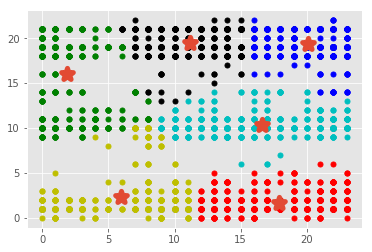

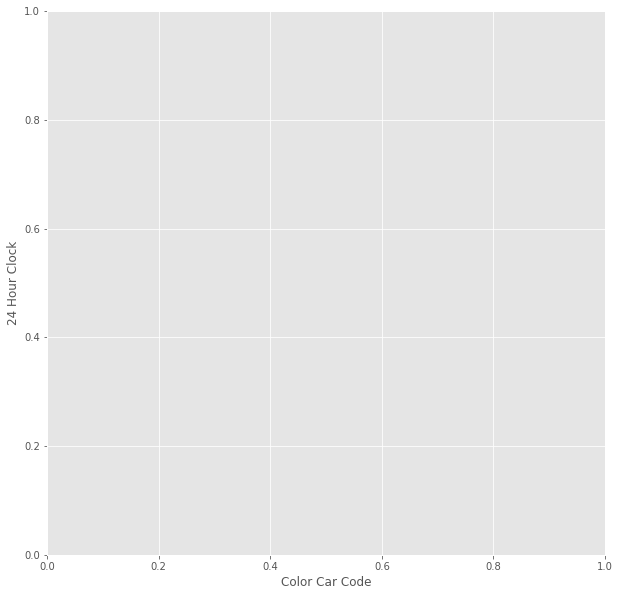

In [45]:
#kmeans clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroid)
print(labels)

colors = ["c.","g.","y.","b.","r.","k."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(centroid[:,0],centroid[:,1], marker = "*", s=150, linewidths = 5, zorder =10)
plt.show()

* Do the clustering methods generate the same clusters?

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')

In [13]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.70383033978470888

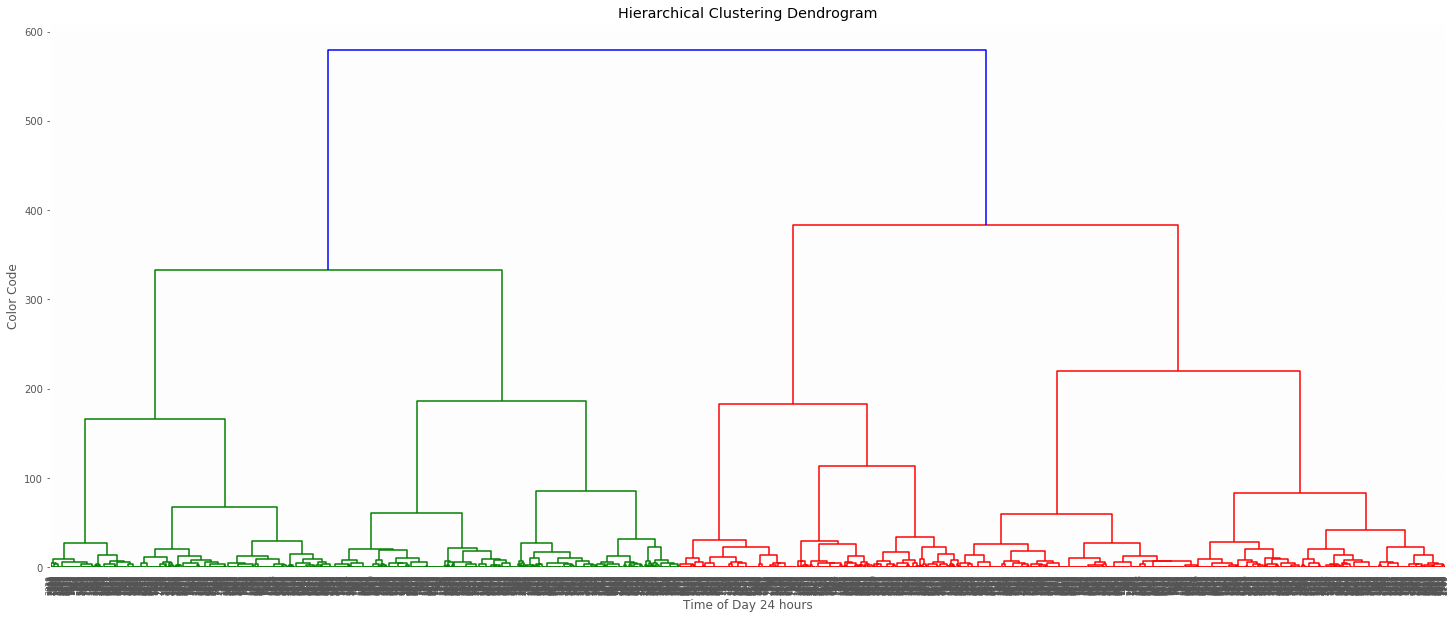

In [14]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time of Day 24 hours')
plt.ylabel('Color Code')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [15]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs


In [16]:
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

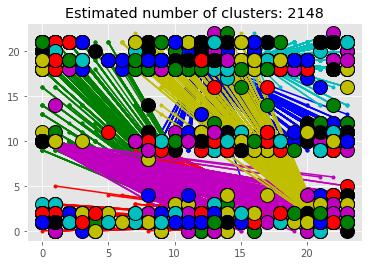

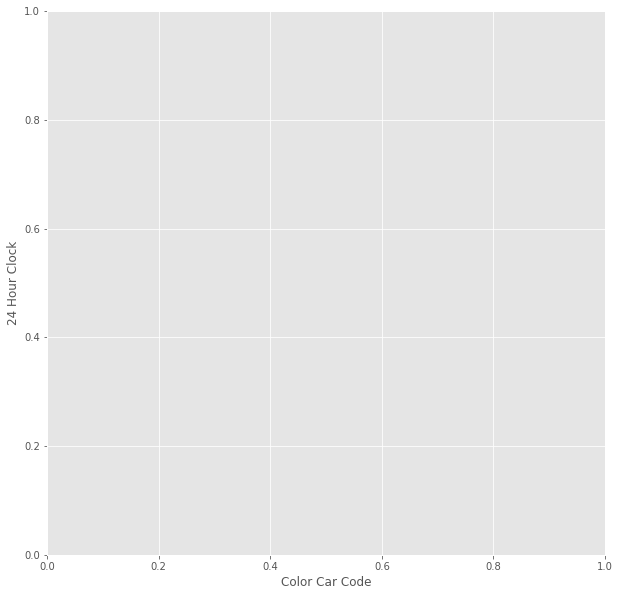

In [46]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Color Car Code')
plt.ylabel('24 Hour Clock')
plt.show()
#plt.gca().axis([0, 10, 0, 10])

* Do the clustering methods generate the same clusters?

Well, to me it looks alike.
The first method of clustering that is done with K-Means algorithm.
The Second method of clustering that is done with Affinity Propgation.
Plotting the graphs looks exactly the same.


In [18]:
df_nonull["PropertyDamage_code"] = df_nonull["PropertyDamage"].astype('category')
df_nonull["PropertyDamage_code"] = df_nonull["PropertyDamage_code"].cat.codes

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df_nonull['place'] = df_nonull['Latitude']+df_nonull['Longitude']

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


    Linear Regression

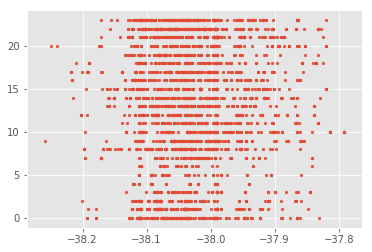

In [20]:
f1 = df_nonull['place'].values
f2 = df_nonull['timenw'].values
x = np.array(list(zip(f1,f2)))
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Color Car')
plt.ylabel('24 Hour Clock')
plt.scatter(f1,f2,s=7)

formula: y = [[ 4.57952706]]x + [ 186.98041529]


C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


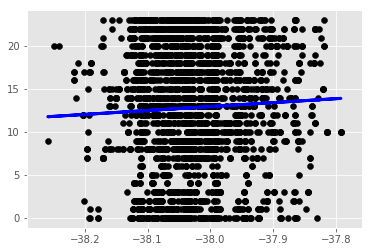

In [21]:
#forget this for a while
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x=df_nonull["place"]
y=df_nonull["timenw"]

# Reshaping
x, y = x.reshape(-1,1), y.reshape(-1, 1)

X_train, X_Test, Y_train, Y_test = train_test_split(x,y,test_size=0.3, random_state=0)
# Linear Regression Object 
lin_regression = LinearRegression()

# Fitting linear model to the data
lin_regression.fit(X_train,Y_train)

# Get slope of fitted line
m = lin_regression.coef_

# Get y-Intercept of the Line
b = lin_regression.intercept_

# Get Predictions for original x values
# you can also get predictions for new data
predictions = lin_regression.predict(x)

# following slope intercept form 
print ("formula: y = {0}x + {1}".format(m, b)) 

# Plot the Original Model (Black) and Predictions (Blue)
plt.scatter(x, y,  color='black')
plt.plot(x, predictions, color='blue',linewidth=3)
plt.show()

In [22]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.295e+37
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:19:40   Log-Likelihood:             1.2072e+05
No. Observations:                3460   AIC:                        -2.414e+05
Df Residuals:                    3458   BIC:                        -2.414e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.84e-19   3.53e+18      0.000       1.000       1.000
x2         -2.168e-17      3e-19    -72.290      0.000   -2.23e-17   -2.11e-17
==============================================================================
Omnibus:                     2172.128   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18207.247
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      12.481   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [  1.00000000e+00  -2.16840434e-17]
R2:  1.0


C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


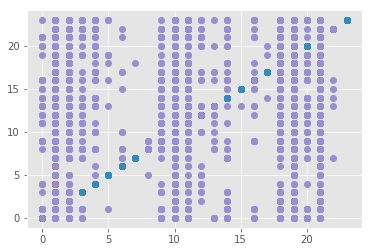

In [24]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(-88.1, -37.7, 0.5)
y2 = 186.98 + (4.58*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(-10, 24, 0.33)
y2 = (-2.168e-17*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

* Are any model assumptions violated?   

The meta data along with dataset did not show any evidences that registered accident is result of multiple car collision. It is assumed that all the cars have met accident independantly like and have not had any impact on other cars.

* Is there any multi-colinearity in the model?   

Car meeting an accident and damaging property is the only Colinearity. This model does not assumes any other colinearity

* In the multiple regression models are predictor variables independent of all the other predictor variables?   
N/A
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. N/A  

* Does the model make sense?  
The puprose of the model was to identify the accident prone areas. With this government can take measures to prevent accident by performing root cause analysis and implement the solutions to make driving safe.
Citizens can be take extra cautions to avoid accidents.

* Cross-validate the model. How well did it do?      

* Does regularization help with creating models that validate better on out of sample data?

Logistic Linear Model

The plot of this model is between Time and property damage.The purpose of the model was to estimate property loss that is involved in the accident.


* Are any model assumptions violated?   

The meta data along with dataset did not show any evidences that registered accident is result of multiple car collision. It is assumed that all the cars have met accident independantly like and have not had any impact on other cars.


In [26]:
df1 = df_nonull[['PropertyDamage_code','timenw']]
df1.groupby('PropertyDamage_code').count()

,timenw
PropertyDamage_code,
0,3332
1,128


In [27]:
df1.describe()

,PropertyDamage_code,timenw
count,3460.000000,3460.000000
mean,0.036994,12.786705
std,0.188775,7.288674
min,0.000000,0.000000
25%,0.000000,8.000000
50%,0.000000,13.000000
75%,0.000000,19.000000
max,1.000000,23.000000


In [28]:
df1.groupby('PropertyDamage_code').median()

,timenw
PropertyDamage_code,
0,13
1,13


In [29]:
def scaled_df(df2):
    scaled = pd.DataFrame()
    for item in df2:
        if item in df2.select_dtypes(include=[np.float]):
            scaled[item] = ((df2[item] - df2[item].min()) / 
            (df2[item].max() - df2[item].min()))
        else: 
            scaled[item] = df2[item]
    return scaled
df1_scaled = scaled_df(df1)

C:\Users\Omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


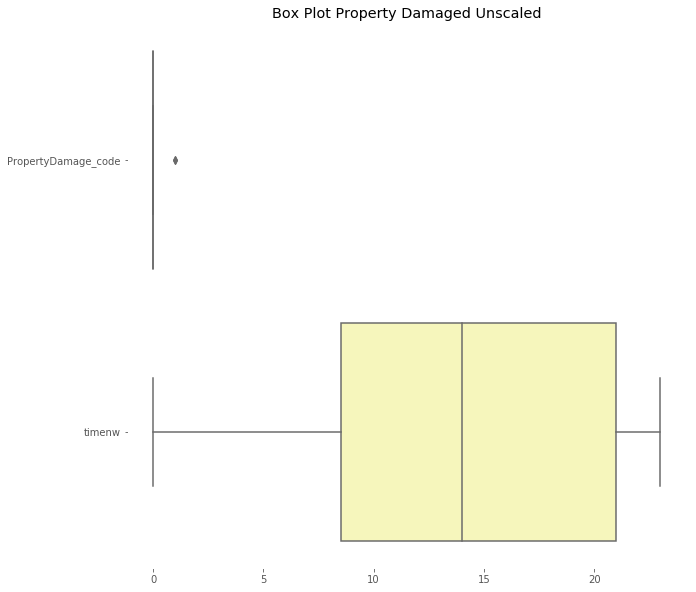

In [30]:
f, ax = plt.subplots(figsize=(10, 10))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Property Damaged Unscaled")
ax.set(ylim=(-.05, 1.05))
ax = sns.boxplot(data = df1[1:24], 
  orient = 'h', 
  palette = 'Set3')

*Cross Validation model

In [31]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[  1.44588674e-004,   2.09983980e-001,   1.43793939e-001, ...,
          9.71287505e-005,   4.52021460e-008,   1.02785569e-128],
       [  1.92636757e-077,   2.28890023e-003,   1.17352746e-002, ...,
          8.96947665e-003,   2.96394355e-004,   6.48730476e-069],
       [  3.29499113e-114,   1.20177241e-004,   1.91019652e-003, ...,
          4.75346039e-002,   1.17555553e-002,   3.11868086e-039],
       ..., 
       [  1.98238973e-151,   4.90483270e-006,   2.95492288e-004, ...,
          1.46864278e-001,   1.63834901e-001,   1.25239470e-009],
       [  2.08899835e-136,   1.73670295e-005,   5.64945486e-004, ...,
          1.01996243e-001,   7.66896242e-002,   1.72601098e-021],
       [  4.11820721e-070,   3.99290154e-003,   1.64027388e-002, ...,
          6.17279403e-003,   1.34984597e-004,   7.28651499e-075]])

In [32]:
LRm.coef_

array([[  4.16220546e+00,  -1.69201827e+01,   2.49077556e-02],
       [ -1.73905936e-01,  -5.63560045e-01,  -1.11835574e-02],
       [ -5.26983587e-01,  -3.34314732e-01,  -2.04581421e-02],
       [ -7.55169145e-01,  -2.51235299e-01,  -1.16688056e-02],
       [ -1.39470175e+00,  -1.96686656e-01,  -2.23146601e-02],
       [ -1.36943658e+00,  -1.62605188e-01,  -4.14096168e-04],
       [ -2.11821656e+00,  -1.32401994e-01,   4.94326733e-02],
       [ -1.30950258e+00,  -1.12109281e-01,   3.87695569e-03],
       [ -9.63259954e-01,  -9.31290802e-02,  -1.13105557e-02],
       [ -1.10416278e+00,  -7.23477299e-02,  -7.31116616e-04],
       [ -1.15646381e+00,  -5.26661879e-02,  -1.06989915e-02],
       [ -1.32635289e+00,  -3.31398746e-02,  -2.29778909e-02],
       [ -1.46191831e+00,  -1.45743640e-02,   2.41758220e-03],
       [ -1.37190528e+00,   5.34981746e-03,  -3.62491692e-02],
       [ -1.77630501e+00,   2.46600836e-02,   2.16753382e-02],
       [ -1.94637258e+00,   4.64246854e-02,   7.9265854

In [33]:
LRm.intercept_

array([   4.16220546,   -0.17390594,   -0.52698359,   -0.75516915,
         -1.39470175,   -1.36943658,   -2.11821656,   -1.30950258,
         -0.96325995,   -1.10416278,   -1.15646381,   -1.32635289,
         -1.46191831,   -1.37190528,   -1.77630501,   -1.94637258,
         -2.01523884,   -2.18502863,   -2.69842044,   -3.08856528,
         -3.70109235,   -4.64912565,   -8.70149922, -154.03773835])

In [34]:
LRm.decision_function(X_test) # Predict confidence scores for samples.

array([[  -8.54595626,   -0.93373903,   -1.42919819, ...,   -8.9438756 ,
         -16.6166542 , -294.40795011],
       [-177.32435134,   -6.75945996,   -5.12013392, ...,   -5.39031309,
          -8.804605  , -157.68945958],
       [-261.87544929,   -9.5996273 ,   -6.83262387, ...,   -3.59228647,
          -5.00993231,  -89.23656068],
       ..., 
       [-346.97451786,  -12.19375638,   -8.09503468, ...,   -1.72235245,
          -1.59214304,  -20.46668023],
       [-312.71072063,  -11.25675677,   -7.77419364, ...,   -2.49974272,
          -2.80507917,  -48.10430667],
       [-160.4290764 ,   -6.18471636,   -4.76536105, ...,   -5.7479573 ,
          -9.57381817, -171.37139441]])

In [35]:
LRm.predict(X_test)

array([ 1, 14, 14, 22, 14, 23, 14,  1,  1, 13,  8, 22, 13,  9,  1, 17, 13,
       22, 22,  8, 14,  1,  1, 13, 21, 22, 22, 22, 13, 13,  0,  9,  9, 21,
       22, 22, 23, 17, 21,  8, 17, 14,  9,  8, 22,  8,  8, 23, 13, 14,  9,
        0,  0, 22, 14,  0, 14, 23, 22, 22,  0, 22, 13, 17, 21, 14,  9,  1,
       21, 14, 17, 14, 22, 13, 13, 23,  0, 14,  9,  8,  9, 22, 14, 22, 14,
       17, 23,  0, 21,  1,  1, 22,  9,  1, 22,  0, 17, 17, 14,  1, 13, 21,
       22, 22, 13,  0,  9, 14,  0,  1, 21, 14,  9, 17, 14,  0, 13, 13,  0,
       17,  0, 22,  1, 23, 22, 21,  1, 17,  9, 22,  1, 22, 23, 22,  8, 22,
       21, 23, 17, 17, 21, 17, 22,  9, 17, 14, 22, 13, 14, 13, 22, 14,  1,
       13, 17, 14, 21,  9, 22, 13,  9,  0,  0, 14, 21,  0, 17,  0,  1, 22,
        9, 23, 17,  8, 22,  8, 14,  1, 13, 22,  1, 14, 13,  8, 23, 13, 13,
       13, 17, 14, 14,  0,  8, 13,  1,  9, 17, 14, 22, 22, 22, 10,  8, 13,
       22, 22, 21, 17, 13, 22,  0, 13, 23,  9,  0,  9,  0, 21, 14, 14, 21,
       14, 13,  9,  9, 21

In [36]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.354046242775
